# NEURAL NETWORKS

# Import Modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import warnings;
warnings.simplefilter('ignore')

# Read Data
* Drop Unnecessary column 'Unnamed: 0', it was a duplicate of the row numbers
* Show a preview of the first 5 rows of the dataset
* The data set has already been pre proceesed and was used for the random forest classifier

In [2]:
data = pd.read_csv('filtered_loans.csv',)
data =data.drop('Unnamed: 0', axis=1)
data.head()

,clientIncome,clientAge,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,...,clientMaritalStatus_Single,clientMaritalStatus_Widowed,incomeVerified_False,incomeVerified_True,incomeVerified_False.1,clientResidentialStauts_Employer Provided,clientResidentialStauts_Family Owned,clientResidentialStauts_Own Residence,clientResidentialStauts_Rented,clientResidentialStauts_Temp. Residence
0,52500.0,29,7,257.0,153.000000,6,16000,20.0,60,1,...,1,0,1,0,0,0,0,0,1,0
1,52500.0,25,21,3964.0,269.426415,9,14500,15.0,60,0,...,1,0,1,0,0,0,0,0,1,0
2,35000.0,32,29,1140.0,77.147826,2,19500,15.0,60,0,...,1,0,1,0,0,0,0,0,1,0
3,35000.0,28,36,2764.0,31.678112,4,19500,15.0,60,1,...,0,0,1,0,0,0,0,1,0,0
4,35000.0,34,36,504.0,3.000000,5,17500,12.5,60,1,...,0,0,1,0,0,0,0,0,1,0


# Handling Imbalanced Class Set
* This was done by performing an Up-sample on the Minority Class
* The value of the minority class was up sampled to match the value of the majority class

In [0]:
df_maj = data[data.loanDefault==0]
df_min = data[data.loanDefault==1]

df_min_upsampled = resample(df_min, 
                            replace=True,     # sample with replacement
                            n_samples=115304,    # to match majority class
                            random_state=42) 

* Concatenate the up-sampled minority class the to the majority class

In [0]:
df_sampled = pd.concat([df_maj, df_min_upsampled])

In [5]:
df_sampled.shape

(230608, 35)

* Confirming the number of samples of each class
* They are both equal now and th data set is now balanced

In [6]:
df_sampled.loanDefault.value_counts()

1    115304
0    115304
Name: loanDefault, dtype: int64

* Assinging the target class to 'y' and data to 'X'

In [0]:
X = df_sampled.drop('loanDefault', axis = 1)
y = df_sampled['loanDefault']

* Split the data into train and test data using the train_test_split()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaled both the X_train and X_test data

In [0]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

# Initalize Parameters

In [0]:
# number of epochs
NUM_EPOCHS = 30

# batch size
BS = 32

# Build the Model

# Model Architecture

* The neural network model first initialised
* The input layer was added with 100 units, activation function used was the relu activation function, also the input shape was initialized.
* Added two hidden layers with a 100 units and relu activation function. 100 units of hidden layer was added to increase model complexity.
* The output layer was finally added with just a unit for the output and a sigmoid activation function which is better for binary classification problem.
* The Dropout was used to prevent the model from overfitting. Dropout randomly reduces the neurons during the model training and limits their contribution both to activation of downstream neuron on forward pass and no weight update is passed to them on the backward pass.  Herwe the set percentage of dropout neuron was by 0.3 and 0.2 on the hidden layer.
* The kernel_initializer set to random_uniform means the layers weight updates will be applied randomly and also uniformly 

* The relu activation function for the input and hidden layers and sigmoid for the output layer was used because we expect binary results from our classifier
* print out the summary


In [11]:
early_stopping_monitor = EarlyStopping(patience=4)


n_cols = X_train_scaled.shape[1]
input_shape = (n_cols,)
model = Sequential()

#input layer
model.add(Dense(100, activation='relu',  kernel_initializer='random_uniform', input_shape = input_shape))

#hidden layers
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(100, activation='relu',  kernel_initializer='random_uniform'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(100, activation='relu',  kernel_initializer='random_uniform'))

#output layers
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)      

# Compile the Model

* Compile the model using the adam optimizer, binary_crossentropy loss as this is a binary classification problem and accuracy as its metrics because that is what we will test the model performance on.

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model 

* Train the model and test it on the validation data with a batch size as initialised from my hyper parameters and epoch also described from the hyper parameter tuning

In [13]:
results = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=BS, epochs=NUM_EPOCHS)

Instructions for updating:
Use tf.cast instead.
Train on 161425 samples, validate on 69183 samples
Epoch 1/30
161425/161425 [==============================] - 51s 315us/step - loss: 0.3987 - acc: 0.8173 - val_loss: 0.3869 - val_acc: 0.8184
Epoch 2/30
161425/161425 [==============================] - 50s 311us/step - loss: 0.3864 - acc: 0.8196 - val_loss: 0.3829 - val_acc: 0.8176
Epoch 3/30
161425/161425 [==============================] - 50s 309us/step - loss: 0.3827 - acc: 0.8196 - val_loss: 0.3794 - val_acc: 0.8186
Epoch 4/30
161425/161425 [==============================] - 42s 259us/step - loss: 0.3799 - acc: 0.8198 - val_loss: 0.3770 - val_acc: 0.8188
Epoch 5/30
161425/161425 [==============================] - 45s 276us/step - loss: 0.3777 - acc: 0.8202 - val_loss: 0.3763 - val_acc: 0.8192
Epoch 6/30
161425/161425 [==============================] - 50s 311us/step - loss: 0.3766 - acc: 0.8204 - val_loss: 0.3732 - val_acc: 0.8197
Epoch 7/30
161425/161425 [=============================

# Get the Test Prediction

* Get our test prediction, convert it to binary and set the prediction threshold to 0.5

In [0]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred>0.4)

* Get the accuracy score from our test target data.
* Here we got an accuracy of 82% which is decent 

In [28]:
print('The model accuracy on test set is: {}'.format(accuracy_score(y_test, y_pred)))

The model accuracy on test set is: 0.8201870401688276


* Print the confusion matrix

In [23]:
print(confusion_matrix(y_test, y_pred))

[[27970  6425]
 [ 6015 28773]]


* Print the classification report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     34395
           1       0.82      0.83      0.82     34788

   micro avg       0.82      0.82      0.82     69183
   macro avg       0.82      0.82      0.82     69183
weighted avg       0.82      0.82      0.82     69183



From the above classification report we can see that the model got an average accuracy of 82% on recall and f1-score while we got 83% accuracy on precision. 


From the classification report, the model is said to be a good model since we both have a high precision and recall value and the difference between the both values is not high.

Also, the model has a high precision for the class one which means it has an 85% accuracy in prediction clients who will default on their loans and a high recall of 80%

Also for this use case a high recall indicates that the company will be able to detect a cleint who could default on their loan, preventing the company from getting harmed  

In [0]:
predictions_prob = model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)

In [0]:
auc = auc(fpr, tpr)

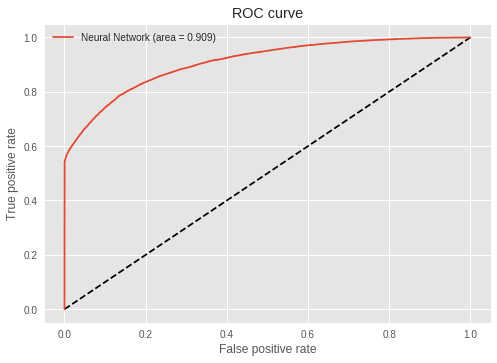

In [35]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Neural Network (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# PLOT THE TRAINING LOSS AND ACCURACY

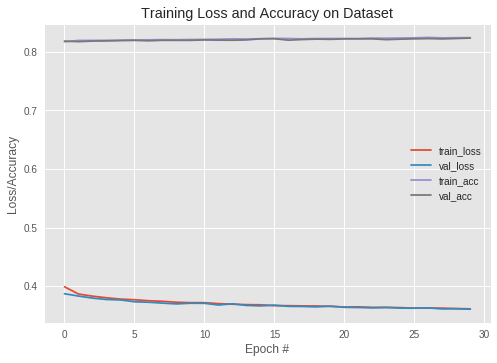

In [25]:
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

The above curve shows that the both the training loss and validation loss decreases at alomost the same rate as the model was training and the number of epoch increased.

Also, the train accuracy and validation accuracy slightly increases as the model trains and is validated on the validation data. We got a good train accuracy of 82% and validation accuracy of 82% which shows that the model was not over fitting as there was no difference or no much difference between the train accuracy and test accuracy.

The model would have been seen as over fitting on the training data if the training accuracy was much higher that the validation accuracy e.g training accuracy as 95% and test accuracy as 56%

or it would have been under fitting on the training data if the training accuracy was much lower that the validation accuracy e.g training accuracy 56% and validation accuracy as 90%

In [26]:
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

Test-Accuracy: 0.820817734603516


In [27]:
print("Train-Accuracy:", np.mean(results.history["acc"]))

Train-Accuracy: 0.8220618450270915


# Final Comparison

For the final model comparison, I will be comparing the models based on their auc score and roc curve because when we do have a model built on a balanced class ROC-AUC is the better metric for determining which model performs better.

* The roc curve of the neural network model has an area under curve as 91%
* The roc curve of the random forest model has an area under curve as 90%

From the above AUC score we can say that the Neural Network slightly better that the Random Forest Model.

Comparing the models based on their precision, recall and f1-score
It is important to note that for this use case the class our model is meant to pay attention to is the class 1 which predicts users who could default on their loan. And that lead us in choosing recall as our most important metric to compare performance on.
* Precision means the percentage of our models prediction that is accurate
* Recall means the percentage of the total relevant class classified by the algorithm. For this use case we should not that we won't b bothered if our model wrongly specify a client as potential loan defaulter. When a client is wrongly classified as non- defualter this decision can be harmful to our business. That is why recall is the best metric here.

For the Neural Network. We have a recall of 81% on class 0 and 83% on class 1.
For the Random Forest Classifier we have a recall of 88% on class 0 and 76% on class 1.

Neural Network is also the best performing model since it has an accuracy of 83% on the class 1 prediction. Correctly identifying potential loan defaulters which will save the company from loss.


For my choice of model to pick, I will go with the Neural Network Model as it is the best performing model.